# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 8 апреля 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 8 апреля, -4 балла после 06:00 15 апреля, -6 баллов после 06:00 22 апреля  -8 баллов после 06:00 29 апреля.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



*** Что почитать по теории ***

Одна из лучших книг по ML $-$ "Pattern Recognition and Machine Learning" Bishop, Christopher. 

Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

**Решение**$$ w_{new} = w_{old} - 2 \frac{\beta}{n} \sum_{i=1}^{n} x_{i} (a_{i} - y_{i}) - 2 \frac{\beta}{C} \sum_{j=1}^{n} w_{j} $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

**Решение** Так как $a_{i} = \frac{1}{1+e^{-\langle\,x_i,w\rangle}} $ , то $$\nabla_{w} a_i = x_{i}e^{-\langle\,x_i,w\rangle}a_{i}^{2}$$
Посчитаем градиент $i$-ого члена суммы по $w$: (обозначая $e^{-\langle\,x_i,w\rangle} $ за $e_{i}$ и учитывая, что $1-a_i = e_i a_i $)
$$ \nabla_{w}(y_i \log a_i + ( 1 - y_i) \log (1 - a_i)) = \frac{y_i x_i e_i a_i (1-a_i) + (y_i - 1)x_i e_i a_{i}^2}{1-a_i} =
\frac{x_i e_i a_i(y_i - a_i)}{1-a_i} = x_i(y_i-a_i)$$
Отсюда формула для обновления весов с $L_2 $ регуляризацией:
$$ w_{new} = w_{old} + \frac{1}{n} \sum_{i=1}^{n} x_i(y_i - a_i)  - 2 \frac{\beta}{C} \sum_{j=1}^{n} w_{j} $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией

**Пункт 1.** На лекции было показано, что 

$$ \nabla_{w} Q(w) = (X^{T}X+X^{T}X)w-2X^{T}y $$

тогда 

$$ \nabla_{w}^{2}Q(w)=2X^{T}X $$ 

Достаточное условие локального минимума - положительная определённость матрицы Гессе. Проверяем:

$$ (X^{T}Xv, v) > 0 \iff v^{T}X^{T}Xv > 0 \iff \|Xv\| > 0 $$

**Пункт 2.** Аналогично выкладкам с лекции запишем:

$$ Q(w) = \frac{1}{N}\|Xw-y\|^{2} + \alpha \|w\|^{2}=\frac{1}{N}(Xw-y)^{T}(Xw-y)+\alpha w^{T}w $$

Первое произведение дифференцируется аналогично, для второго по правилу Лейбница имеем:

$$ \nabla_{w} \alpha w^{T}w = 2\alpha w$$

Складывая их получаем, что 

$$ \nabla_{w} Q(w)=0 \iff (2X^{T}X)w+2\alpha w =2X^{T}y \iff w=(X^{T}X+\alpha I)^{-1}X^{T}y $$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

**Решение** Обозначим соответствующую вероятность за $ p_{1} $ и воспользуемся тем, что сумма равна $1$:

$$ E(L|x_{i})=-p_{1}\log(a(x_{i}))-(1-p_{1})\log(1-a(x_{i}))=p_{1}\log\left[\frac{(1-a(x_{i})}{a(x_{i})}\right]-\log(1-a(x_{i}))$$

Дифференцируя по $a(x_{i})$ и приравнивая к 0 получаем:

$$\frac{p_{1}}{(a(x_{i})-1)a(x_{i})} - \frac{1}{(a(x_{i})-1)} = 0 $$

Откуда следует, что $a(x_{i})=p_{1}$ минимизирует соответствующее мат.ожидание.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    n = X.shape[0]
    p = np.arange(n)
    if shuffle:
        p = np.random.permutation(p)
    for i in range(0, n, batch_size):
        mask = p[i: np.min([i + batch_size, n])]
        yield(X[mask], y[mask])
# Теперь можно сделать генератор по данным ()
#my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    x = x.astype(float)
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', batch_size=10):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.batch_size = batch_size
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        N = X_batch.shape[0]
        R = np.sum(np.square(self.weights))/self.C
        if self.model_type == 'lin_reg':
            a = X_batch.dot(self.weights)
            loss = (1/N)*np.square(np.sum(y_batch-a))+R
        else:
            a = sigmoid(sigmoid(X_batch.dot(self.weights)))
            loss = (-1/N)*np.sum(y_batch*np.log(a)+(1-y_batch)*np.log(1-a))+R
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        N = X_batch.shape[0]
        R = 2*self.weights/self.C
        if self.model_type == 'lin_reg':
            a = X_batch.dot(self.weights)
            loss_grad = (2/N)*(a-y_batch).dot(X_batch)+R
        else:
            a = sigmoid(X_batch.dot(self.weights))
            loss_grad = -(1/N)*(y_batch-a).dot(X_batch)+R
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha*new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        ''' 
        # Нужно инициализровать случайно веса
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.random.uniform(0, 1, X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        if (self.model_type == 'log_reg'):
            y_hat = sigmoid(X.dot(self.weights))
        else:
            y_hat = X.dot(self.weights)
        return y_hat
    

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    w = clf.weights
    x = np.linspace(-2, 6, 2)
    y = -(w[0] + w[1]*x)/w[2]
    plt.plot(x, y)
    

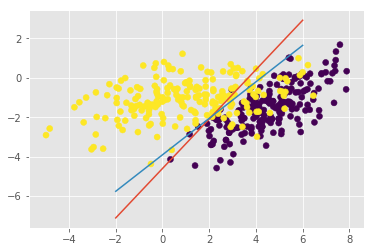

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
my_clf = MySGDClassifier(batch_generator, model_type='log_reg', C=1000,
                         batch_size=1)
my_clf.fit(X, y)
plot_decision_boundary(my_clf)
my_lin_clf = MySGDClassifier(batch_generator, C=1000,
                             model_type='lin_reg', batch_size=10)
y = np.r_[-np.ones(200), np.ones(200)]
my_lin_clf.fit(X, y)
plot_decision_boundary(my_lin_clf)
plt.scatter(X[:, 0], X[:, 1], c=y)


Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

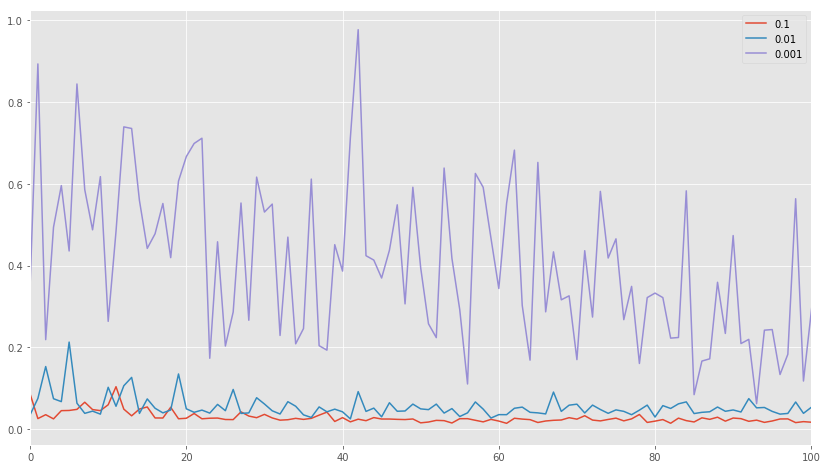

In [12]:
fig, axes = plt.subplots(figsize=(14, 8))
N = 50
_alpha = [0.1, 0.01, 0.001]
for alpha in _alpha:
    my_clf = MySGDClassifier(batch_generator,
                             model_type='lin_reg', C=1000, alpha=alpha,
                             max_epoch=100, batch_size=100)
    my_clf.fit(X, y)
    loss = np.asarray(my_clf.errors_log['loss'])
    _y = np.mean(loss.reshape(N, -1), axis=0)
    plt.plot(_y)
    axes.set_xlim(0, 100)
plt.legend(_alpha)

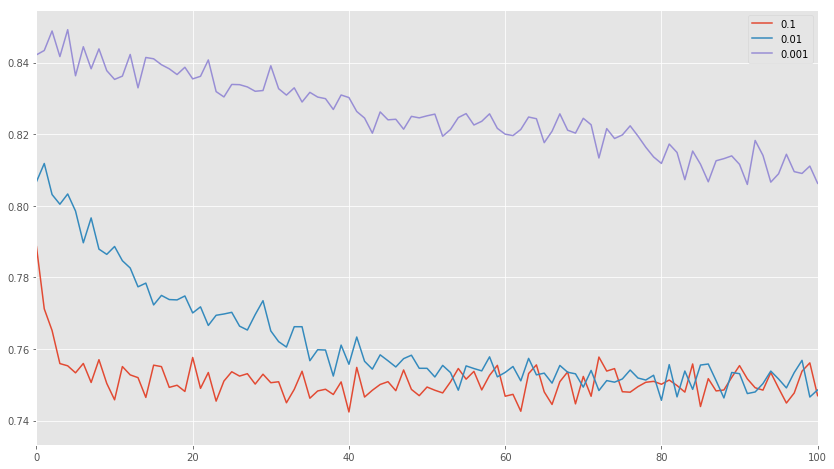

In [13]:
fig, axes = plt.subplots(figsize=(14, 8))
N = 50
_alpha = [0.1, 0.01, 0.001]
for alpha in _alpha:
    my_clf = MySGDClassifier(batch_generator,
                             model_type='log_reg', C=1, alpha=alpha,
                             max_epoch=100, batch_size=100)
    my_clf.fit(X, y)
    loss = np.asarray(my_clf.errors_log['loss'])
    _y = np.mean(loss.reshape(N, -1), axis=0)
    plt.plot(_y)
    axes.set_xlim(0, 100)
plt.legend(_alpha)


Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

(0, 9)

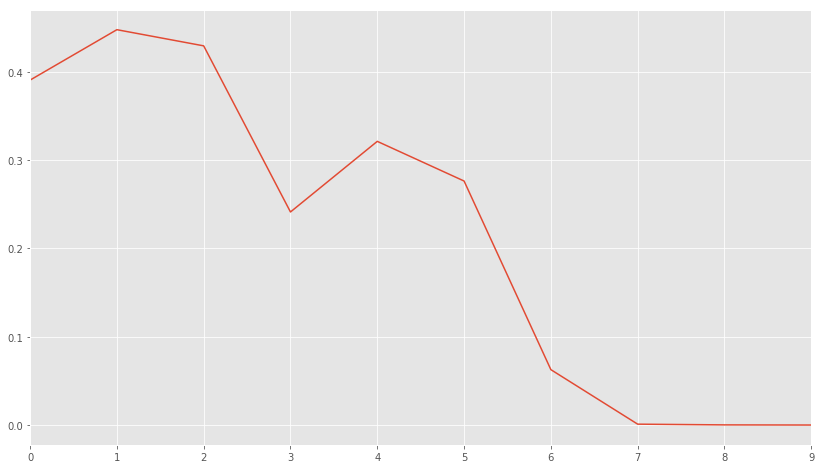

In [14]:
fig, axes = plt.subplots(figsize=(14, 8))
_C = np.logspace(3, -3, 10)
avrg = np.zeros(_C.shape[0])
for i in range(_C.shape[0]):
    my_clf = MySGDClassifier(batch_generator,
                             model_type='lin_reg', C=_C[i],
                             alpha=0.0001, batch_size=1000)
    my_clf.fit(X, y)
    weights = np.asarray(my_clf.weights)
    avrg[i] = np.mean(weights)
plt.plot(avrg)
axes.set_xlim(0, 9)


(0, 9)

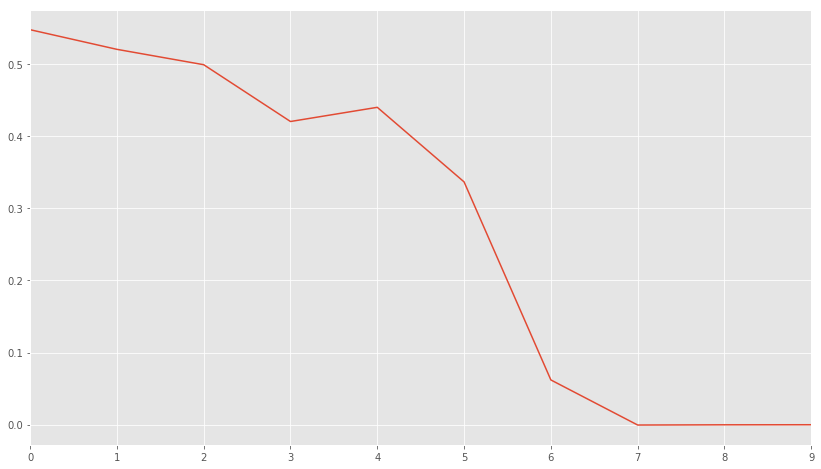

In [15]:
fig, axes = plt.subplots(figsize=(14, 8))
_C = np.logspace(3, -3, 10)
avrg = np.zeros(_C.shape[0])
for i in range(_C.shape[0]):
    my_clf = MySGDClassifier(batch_generator,
                             model_type='log_reg', C=_C[i],
                             alpha=0.0001, batch_size=1000)
    my_clf.fit(X, y)
    weights = np.asarray(my_clf.weights)
    avrg[i] = np.mean(weights)
plt.plot(avrg)
axes.set_xlim(0, 9)


Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview-2.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [16]:
doc_to_title = {}
with open('docs_titles.tsv', encoding="utf8") as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [17]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv', encoding="utf8")
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [18]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [19]:
test_data = pd.read_csv('test_groups.csv', encoding="utf8")
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))
    
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

In [21]:
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [22]:
clf_log = MySGDClassifier(batch_generator,
                          model_type='log_reg', C=1000,
                          alpha=0.1, max_epoch=200, batch_size=4000)
clf_log.fit(X_train, y_train)


MySGDClassifier(C=1000, alpha=0.1,
        batch_generator=<function batch_generator at 0x0000024DB470B620>,
        batch_size=4000, max_epoch=200, model_type='log_reg')

In [23]:
clf_lin = MySGDClassifier(batch_generator,
                          model_type='lin_reg', C=1000,
                          alpha=0.1, max_epoch=220, batch_size=4000)
clf_lin.fit(X_train, y_train)


MySGDClassifier(C=1000, alpha=0.1,
        batch_generator=<function batch_generator at 0x0000024DB470B620>,
        batch_size=4000, max_epoch=220, model_type='lin_reg')

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [24]:
def valid_set(X, y):
    n = np.max(groups_train)
    k = n//4
    p = np.arange(n)+1
    p = np.random.permutation(p)
    mask_train = list(np.any(elem in p[:k] for elem in groups_train))
    mask_valid = list(np.any(elem in p[k:] for elem in groups_train))
    X_train = X[mask_train]
    y_train = y[mask_train]
    X_valid = X[mask_valid]
    y_valid = y[mask_valid]
    return (X_valid, y_valid, X_train, y_train)


In [29]:
X_valid, y_valid, _X_train, _y_train = valid_set(X_train, y_train)


In [26]:
parameters = [
    {
     'batch_generator': [batch_generator],
     'C': np.linspace(1, 10, 10),
     'alpha': [0.1],
     'batch_size':[4000],
     'max_epoch': np.linspace(10, 100, 10).astype(int),
     'model_type': ['log_reg']
    }
]

grid = ParameterGrid(parameters)


In [30]:
best_score = 0
best_params = []
for params in grid:
    clf = MySGDClassifier(**params)
    clf.fit(_X_train, _y_train)
    score = f1_score(y_valid, clf.predict(X_valid) > 0.5)
    if score > best_score:
        best_score = score
        b = [params]

In [31]:
b, best_score

([{'C': 8.0,
   'alpha': 0.1,
   'batch_generator': <function __main__.batch_generator(X, y, shuffle=True, batch_size=1)>,
   'batch_size': 4000,
   'max_epoch': 20,
   'model_type': 'log_reg'}],
 0.6344259358767689)

In [32]:
my_clf = MySGDClassifier(batch_generator, model_type='log_reg', C=8, batch_size=4000, max_epoch=20, alpha=0.1)
my_clf.fit(X_train, y_train)


MySGDClassifier(C=8, alpha=0.1,
        batch_generator=<function batch_generator at 0x0000024DB470B620>,
        batch_size=4000, max_epoch=20, model_type='log_reg')

In [33]:
f1_score(y_valid, my_clf.predict(X_valid) > 0.5)

0.6088583905177791

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

# Контрольные вопросы
Постарайтесь максимально развернуто и честно ответить на вопросы. Они охватывают тему линейных моделей и скорее нужны преподавателям, чтобы понимать, что именно Вы усвоили плохо. Надеюсь, они подскажут, что именно в теме Вы не понимаете или наоборот порадают, что Вы все знаете ^_^

* Опишите основные, на Ваш взгляд,  отличия логистической регрессии от линейной регрессии. Почему, на ваш взгляд, задачу классификации решают логистической, а не линейной регрессией?

Основное отличие - оптимизируемый функционал. В силу того, что логистическая регрессия предсказывает вероятность принадлежности объекта к классу, то разумнее использовать именно её в задачах классификации.

* Как Вы думаете, для каких типов задач (объем данных, число признаков, типы признаков) стоит отдавать предпочтение линейным моделям?

Желательно, чтобы признаки были независимы и их не было слишком много, так как вместе с ними растёт сложность вычислений (тут можно упомянуть плохо обусловленные матрицы и скорость самих вычислений).

* Пусть на обучении мы имеем выборку размера $N$, число признаков $D$. Чему равна алгоритмическая сложность одного шага градиентного спуска? Cтохастического градиентного спуска?  Сложность предсказания на одном объекте?

Шаг GD - $O(ND)$, шаг SGD - $O(D)$, предсказание - $O(D)$

* В чем преимущества стохастического градиентного спуска (в том числе мини-батч) над обычным градиентным спуском? В чем его недостатки? Рассмотрите несколько аспектов $-$ скорость сходимости, необходимость загрузки всех данных в оперативную память, сложность вычисления одного шага.

SGD позволяет не загружать много данных в память, ускоряет вычисления, но может испортить сходимость.

* Как Вы думаете, при обучении линейной модели с помощью SGD, ошибку на новом объекте стоит считать до итерации спуска на этом объекте или после? Почему Вы так думаете? Возможно, Вам будет интересно ознакомиться с http://hunch.net/~jl/projects/prediction_bounds/thesis/mathml/thesisse44.xml

Разумно это делать до итерации, чтобы не подгонять модель под конкретные объекты.

* Как Вы думаете, во времена такого бума нейронных сетей, остаются ли популярными линейные модели, или это уже пережиток прошлого? Почему Вы так думаете?

Линейные модели выделяются своей простотой и эффективностью, я думаю, что они будут актуальны до тех пор, пока показывают хороший результат в задачах, в которых их используют.

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***